# E-Commerce Shipment Delay Analysis (EDA Project)
**Objective:** To explore patterns in shipment performance and identify factors contributing to delays, cost impact, and delivery trends.


In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
df=pd.read_excel(r"C:\Zaid\Data Analysis\EDA\E-Commerce Shipping Data.xlsx")

## Cloumn Details

ID: ID Number of Customers<br><br>
Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.<br><br>
Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.<br><br>
Customer care calls: The number of calls made from enquiry for enquiry of the shipment.<br><br>
Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).<br><br>
Cost of the product: Cost of the Product in US Dollars.<br><br>
Prior purchases: The Number of Prior Purchase.<br><br>
Product importance: The company has categorized the product in the various parameter such as low, medium, high.<br><br>
Gender: Male and Female.<br><br>
Discount offered: Discount offered on that specific product.<br><br>
Weight in gms: It is the weight in grams.<br><br>
Reached on time: It is the target variable, where 0 Indicates that the product has NOT reached on time and 1 indicates it has reached on time.<br><br>

## Data Cleaning

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10999 non-null  int64  
 1   Warehouse_block      10999 non-null  object 
 2   Mode_of_Shipment     10999 non-null  object 
 3   Customer_care_calls  10999 non-null  int64  
 4   Customer_rating      10999 non-null  int64  
 5   Cost_of_the_Product  10999 non-null  int64  
 6   Prior_purchases      10999 non-null  int64  
 7   Product_importance   10986 non-null  object 
 8   Gender               10988 non-null  object 
 9   Discount_offered     10999 non-null  int64  
 10  Weight_in_gms        10999 non-null  int64  
 11  Reached.on.Time_Y.N  10996 non-null  float64
dtypes: float64(1), int64(7), object(4)
memory usage: 1.0+ MB


In [63]:
df.isnull().sum()

ID                      0
Warehouse_block         0
Mode_of_Shipment        0
Customer_care_calls     0
Customer_rating         0
Cost_of_the_Product     0
Prior_purchases         0
Product_importance     13
Gender                 11
Discount_offered        0
Weight_in_gms           0
Reached.on.Time_Y.N     3
dtype: int64

Found 13,11 and 3 Missing Values in Product_importance, Gender and Reached.on.Time_Y.N respectively

In [64]:
df.fillna({"Product_importance": df["Product_importance"].mode()[0]}, inplace=True)

In [65]:
df.fillna({"Gender":df["Gender"].mode()[0]},inplace=True)

In [66]:
df.fillna({"Reached.on.Time_Y.N": df["Reached.on.Time_Y.N"].mode()[0]}, inplace=True)


In [67]:
df.isnull().sum()


ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

All the Missing values are categorical so used fillna method to fill with Mode() function

In [68]:
df.duplicated().sum()

0

0 duplicated rows

### Outlier Analysis

In [69]:
numerical_cols=['Customer_rating','Cost_of_the_Product','Discount_offered','Weight_in_gms']

for col in numerical_cols:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  outliers=df[(df[col]<lower_bound) | (df[col]>upper_bound)]
  print(col+" "+ ':'+" " +str(len(outliers))+" "+ 'outliers')

Customer_rating : 0 outliers
Cost_of_the_Product : 0 outliers
Discount_offered : 2209 outliers
Weight_in_gms : 0 outliers


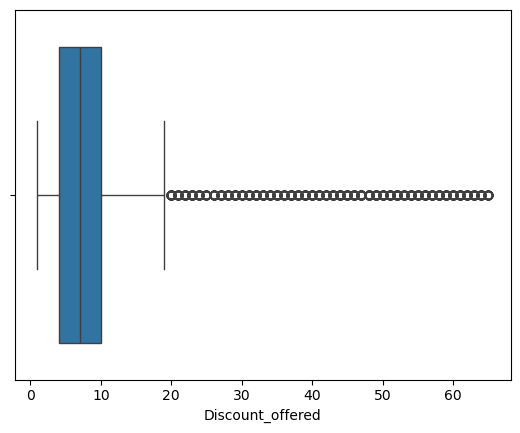

In [70]:
sns.boxplot(x=df['Discount_offered'])
plt.show()

### Outlier Analysis: Discount_offered

As the IQR method flags 2209 outliers in the `Discount_offered` column,
we chose **not to treat** them because:

- The distribution of discounts can naturally vary due to buisness strategies.
- High discounts may be part of business logic.

Hence, we **retain** all values in `Discount_offered` for analysis.

# Univariate Analysis

### 🚚 Distribution of Shipments by Warehouse Block


In [71]:
df['Warehouse_block'].value_counts(normalize=True)*100

Warehouse_block
F    33.330303
D    16.674243
A    16.665151
B    16.665151
C    16.665151
Name: proportion, dtype: float64

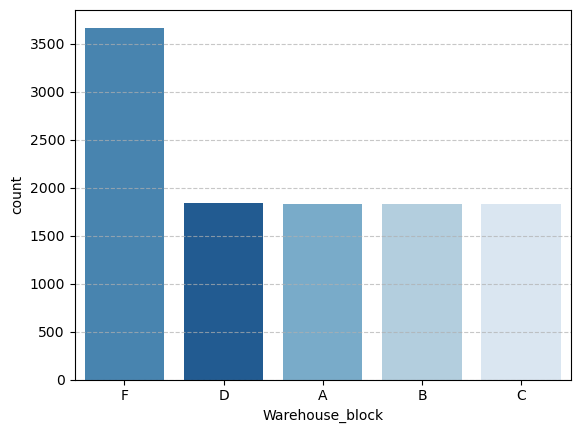

In [72]:
sns.countplot(
    data=df,
    x='Warehouse_block',
    hue='Warehouse_block',  
    order=df['Warehouse_block'].value_counts().index,
    palette="Blues_r"
)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**F Warehouse_block** has the largest shipment distribution, 
while the distributions of the other blocks are **nearly identical**.


### Preferred Mode of Shipment

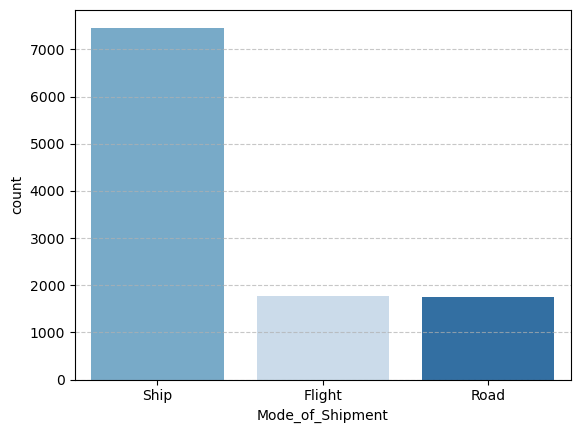

In [73]:
sns.countplot(
    data=df,
    x='Mode_of_Shipment',
    hue='Mode_of_Shipment',
    order=df['Mode_of_Shipment'].value_counts().index,
    palette='Blues'
)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Ship** is the most preferred mode of shipment followed by Flight and Road

### Distribution of Customer Rating

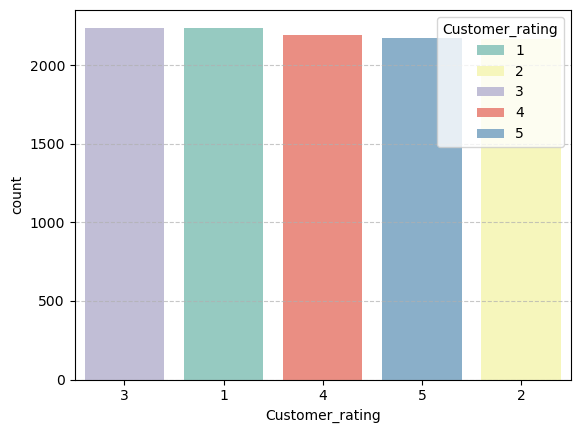

In [74]:
sns.countplot(
    data=df,
    x='Customer_rating',
    hue='Customer_rating',
    order=df['Customer_rating'].value_counts().index,
    palette='Set3'
)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Most Customers gave **3 Star** rating

### Distribution of Gender

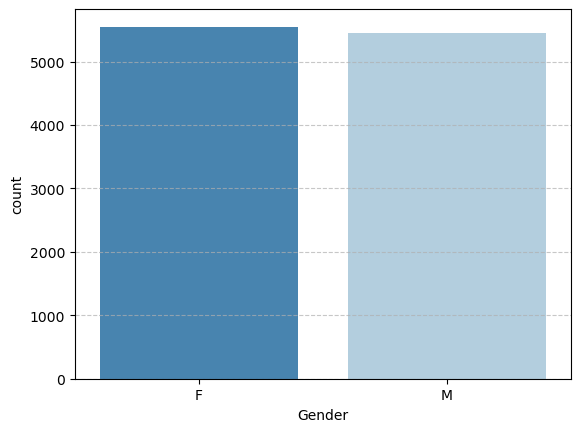

In [75]:
sns.countplot(
    data=df,
    x='Gender',
    hue='Gender',
    palette='Blues_r'
)
plt.grid(axis='y', linestyle='--', alpha=0.7)

**Females** are slightly more in numbers as compared to Male

### Shipment Delivery Status

In [76]:
df['Delivery_status']=df['Reached.on.Time_Y.N'].map({1:'On time',0:'Delayed'})

Created a new column Delivery_status where 1 for On Time and 0 for Delayed

In [77]:
df['Delivery_status'].value_counts(normalize=True)*100

Delivery_status
On time    59.669061
Delayed    40.330939
Name: proportion, dtype: float64

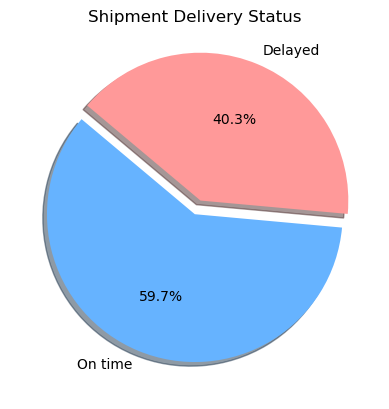

In [78]:
stats_count=df['Delivery_status'].value_counts()
labels=['On time','Delayed']
colors = ['#66b3ff', '#ff9999'] 
plt.pie(stats_count,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        explode=[0, 0.1],  
        shadow=True
        )
plt.title('Shipment Delivery Status')
plt.show()

**59.7%** of Shipment was on time and **40.3%** got delayed

### Total Revenue Lost to Discounts

In [79]:
df['revenue_lost']=df['Discount_offered']
print(df['revenue_lost'].sum())

147092


- **Total Discount Offered Across Orders**: ₹ 147092  

This metric indicates how much potential revenue the business sacrificed in the form of discounts. A high number may suggest overly aggressive discounting or lack of targeted pricing.


# Bi-Variate Analysis

## Avg rating by Shipment Mode

In [80]:
df.groupby('Mode_of_Shipment')['Customer_rating'].mean()

Mode_of_Shipment
Flight    2.982555
Road      2.995455
Ship      2.991289
Name: Customer_rating, dtype: float64

## Distribution of delayed shipment by mode of transport//Delay Rate by Shipment Mode

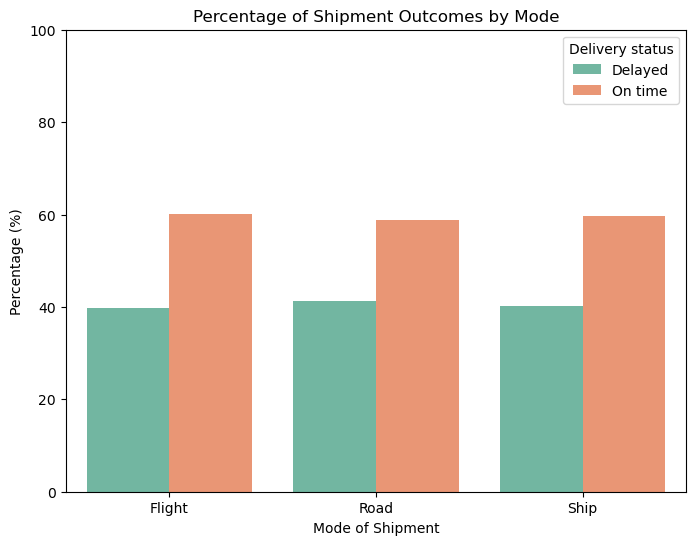

In [81]:
group_counts = df.groupby(['Mode_of_Shipment', 'Delivery_status']).size().reset_index(name='Count')

total_by_mode = group_counts.groupby('Mode_of_Shipment')['Count'].transform('sum')
group_counts['Percent'] = (group_counts['Count'] / total_by_mode) * 100

plt.figure(figsize=(8, 6))
sns.barplot(data=group_counts,
            x='Mode_of_Shipment',
            y='Percent',
            hue='Delivery_status',
            palette='Set2')

plt.title('Percentage of Shipment Outcomes by Mode')
plt.ylabel('Percentage (%)')
plt.xlabel('Mode of Shipment')
plt.ylim(0, 100)
plt.legend(title='Delivery status')
plt.show()

All modes of shipment has almost same % of Delay

## Average Weight of shipment by Shipment Mode

In [82]:
df.groupby('Mode_of_Shipment')['Weight_in_gms'].mean()

Mode_of_Shipment
Flight    3629.378165
Road      3649.550568
Ship      3631.457518
Name: Weight_in_gms, dtype: float64

Road Shipment mode have tend to carry more Heavy Shipments as compared to other Shipment Modes

## Correlation & Multivariate Analysis

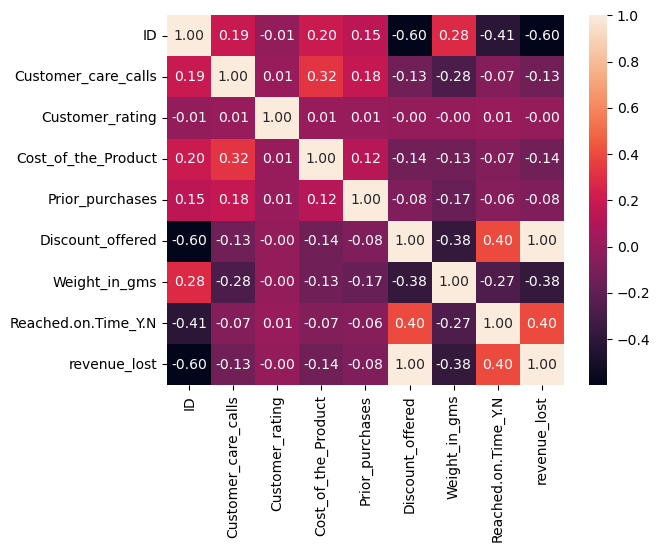

In [83]:
sns.heatmap(df.corr(numeric_only=True),
            annot=True,
            fmt='.2f')
plt.show()

There is a positive correlation between 'Discount_offered' and 'Reached.on.Time_Y.N'~0.40

C:\Users\khanz\AppData\Local\Temp\ipykernel_18116\1752169847.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


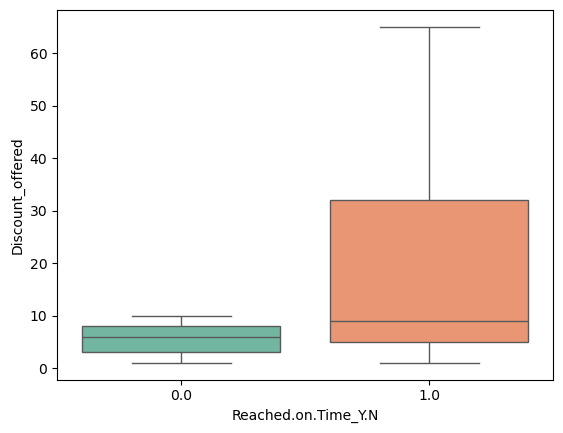

In [84]:
sns.boxplot(
    data=df,
    x='Reached.on.Time_Y.N',
    y='Discount_offered',
    palette='Set2')
plt.show()

C:\Users\khanz\AppData\Local\Temp\ipykernel_18116\3198329506.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,


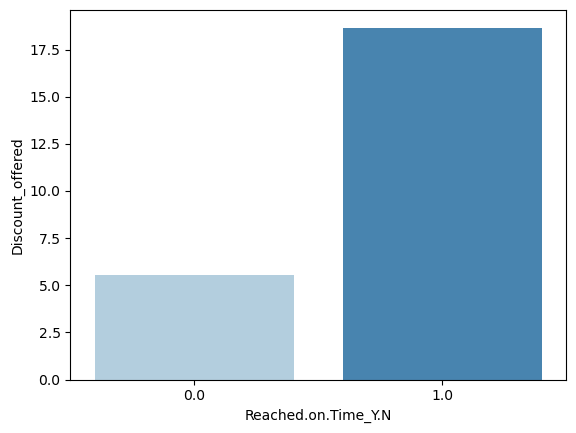

In [85]:
sns.barplot(data=df,
            x='Reached.on.Time_Y.N',
            y='Discount_offered',
            errorbar=None,
            palette='Blues')
plt.show()

As there is Positive correlation between Discount_offered and  Reached.on.Time_Y.N ~ 0.40, to make sure of this correlation we have performed another two analysis of these two Columns using Boxplot and Barplot and both of which shows that products with higher discounts are more likely to reach on time.

## 🔍 Key Insights:

- Warehouse Block **F** processes the most orders.
- Most preferred mode of shipment is **Ship**
- Most Customers gave **3 Star** rating
- **Females** are slightly more in numbers as compared to Male
- **59.7%** of Shipment was on time and **40.3%** got delayed
- All modes of shipment has almost same % of Delay
- There is a positive correlation between 'Discount_offered' and 'Reached.on.Time_Y.N'~0.40
- Verified positive correlation (~0.40) between discount offered and on-time delivery using heatmap, boxplot, and barplot — indicating higher discounts lead to more timely shipments.

